In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline

In [21]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# Ignore Convergence and Linear Algebra warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [22]:
time = np.array([range(1, 25)]).reshape(-1, 1)
temperature = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])

In [23]:
# Define polynomial degree
degree = 15

# Fit Least Squares
least_squares_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
least_squares_model.fit(time, temperature)

# Fit LASSO
LASSO_model = make_pipeline(PolynomialFeatures(degree), Lasso())
LASSO_model.fit(time, temperature)

# Fit Ridge
Ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge())
Ridge_model.fit(time, temperature)

# Fit Elastic Net
ElasticNet_model = make_pipeline(PolynomialFeatures(degree), ElasticNet())
ElasticNet_model.fit(time, temperature)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('elasticnet', ElasticNet())])

In [24]:
# Predictions
pred_least_squares = least_squares_model.predict(time)
pred_LASSO = LASSO_model.predict(time)
pred_Ridge = Ridge_model.predict(time)
pred_ElasticNet = ElasticNet_model.predict(time)

def calc_e2_err(prediction, truth):
    return np.sum((prediction - truth)**2)

# Calculate E2 Errors
e2_least_squares = calc_e2_err(pred_least_squares, temperature)
e2_lasso = calc_e2_err(pred_LASSO, temperature)
e2_ridge = calc_e2_err(pred_Ridge, temperature)
e2_elastic_net = calc_e2_err(pred_ElasticNet, temperature)

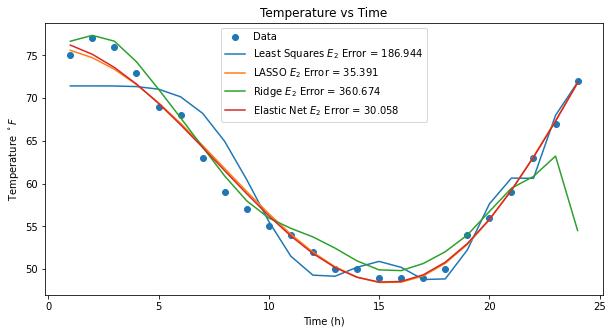

In [25]:
# Plot data and the fit of the regression models with e2 errors

plt.figure(figsize = (10, 5))

plt.scatter(time, temperature, label = "Data")
plt.plot(time, pred_least_squares, label = f"Least Squares $E_2$ Error = {e2_least_squares:.3f}")
plt.plot(time, pred_LASSO, label = f"LASSO $E_2$ Error = {e2_lasso:.3f}")
plt.plot(time, pred_Ridge, label = f"Ridge $E_2$ Error = {e2_ridge:.3f}")
plt.plot(time, pred_ElasticNet, label = f"Elastic Net $E_2$ Error = {e2_elastic_net:.3f}")
plt.xlabel("Time (h)")
plt.ylabel("Temperature $^\circ F$")
plt.title("Temperature vs Time")
plt.legend()
plt.savefig("TempvTime.pdf")
plt.show()

### Introducing Corruption

In [26]:
# Set random seed
np.random.seed(42)

# Create corrupted dataset
corrupt_temperature = temperature.copy()
random_index = np.random.choice(len(corrupt_temperature)) #use np.random.choice to pick a random index
corrupt_temperature[random_index] = 0  # Simulating the outlier

# Re-fit models
least_squares_model.fit(time, corrupt_temperature)
LASSO_model.fit(time, corrupt_temperature)
Ridge_model.fit(time, corrupt_temperature)
ElasticNet_model.fit(time, corrupt_temperature)

# Predictions
pred_least_squares = least_squares_model.predict(time)
pred_LASSO = LASSO_model.predict(time)
pred_Ridge = Ridge_model.predict(time)
pred_ElasticNet = ElasticNet_model.predict(time)

# # Compute E2 Error (Sum of Squared Errors)
e2_least_squares = calc_e2_err(pred_least_squares, corrupt_temperature)
e2_lasso = calc_e2_err(pred_LASSO, corrupt_temperature)
e2_ridge = calc_e2_err(pred_Ridge, corrupt_temperature)
e2_elastic_net = calc_e2_err(pred_ElasticNet, corrupt_temperature)

# Print E_2 Errors

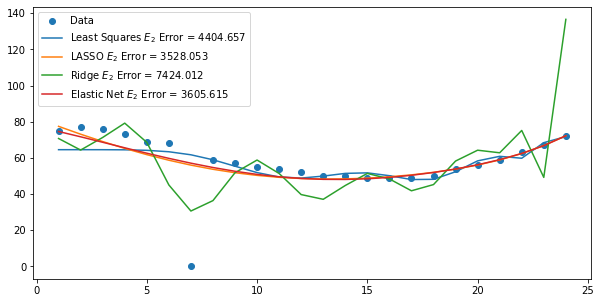

In [27]:
# Plot data and the fit of the regression models with e2 errors

plt.figure(figsize = (10, 5))

plt.scatter(time, corrupt_temperature, label = "Data")
plt.plot(time, pred_least_squares, label = f"Least Squares $E_2$ Error = {e2_least_squares:.3f}")
plt.plot(time, pred_LASSO, label = f"LASSO $E_2$ Error = {e2_lasso:.3f}")
plt.plot(time, pred_Ridge, label = f"Ridge $E_2$ Error = {e2_ridge:.3f}")
plt.plot(time, pred_ElasticNet, label = f"Elastic Net $E_2$ Error = {e2_elastic_net:.3f}")

plt.legend()
plt.show()

In [28]:
Ridge_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('ridge', Ridge())])

In [29]:
coeff_least_squares = LASSO_model.named_steps['lasso'].coef_


print(coeff_least_squares)

[ 0.00000000e+00 -4.62476695e+00  8.08481141e-02  8.17750370e-03
 -1.09468543e-04 -4.91111089e-06 -8.02988281e-08  5.16071190e-10
  9.35816226e-11  4.37002049e-12  1.47840666e-13  3.89700731e-15
  6.48059201e-17 -9.00860915e-19 -1.59568794e-19 -1.05432625e-20]


In [30]:
n_trials = 100

# Store coeff for each model
coeffs_least_squares_list = []
coeffs_LASSO_list = []
coeffs_Ridge_list = []
coeffs_ElasticNet_list = []

for i in range(n_trials):
    np.random.seed(i)
    corrupt_temperature = temperature.copy()
    random_index = np.random.choice(len(corrupt_temperature)) #use np.random.choice to pick a random index
    corrupt_temperature[random_index] = 0  # Simulating the outlier

    least_squares_model.fit(time, corrupt_temperature)
    LASSO_model.fit(time, corrupt_temperature)
    Ridge_model.fit(time, corrupt_temperature)
    ElasticNet_model.fit(time, corrupt_temperature)    

    coeff_least_squares = least_squares_model.named_steps['linearregression'].coef_
    coeff_LASSO = LASSO_model.named_steps['lasso'].coef_
    coeff_Ridge = Ridge_model.named_steps['ridge'].coef_
    coeff_ElasticNet = ElasticNet_model.named_steps['elasticnet'].coef_

    coeffs_least_squares_list.append(coeff_least_squares)
    coeffs_LASSO_list.append(coeff_LASSO)
    coeffs_Ridge_list.append(coeff_Ridge)
    coeffs_ElasticNet_list.append(coeff_ElasticNet)

In [31]:
# Calculate Variance

In [32]:
import pandas as pd

In [33]:
coeffs_ls_pd = pd.DataFrame(coeffs_least_squares_list)
coeffs_lasso_pd = pd.DataFrame(coeffs_LASSO_list)
coeffs_ridge_pd = pd.DataFrame(coeffs_Ridge_list)
coeffs_en_pd = pd.DataFrame(coeffs_ElasticNet_list)

In [34]:
variance_least_squares = np.array(coeffs_ls_pd.var())
variance_lasso = np.array(coeffs_lasso_pd.var())
variance_ridge = np.array(coeffs_ridge_pd.var())
variance_en = np.array(coeffs_en_pd.var())

In [35]:
# print(coeffs_least_squares_list.T)
coeffs_least_squares_list = np.array(coeffs_least_squares_list)
coeffs_LASSO_list = np.array(coeffs_LASSO_list)
coeffs_Ridge_list = np.array(coeffs_Ridge_list)
coeffs_ElasticNet_list = np.array(coeffs_ElasticNet_list)

In [36]:
coeffs_ElasticNet_list.shape

(100, 16)

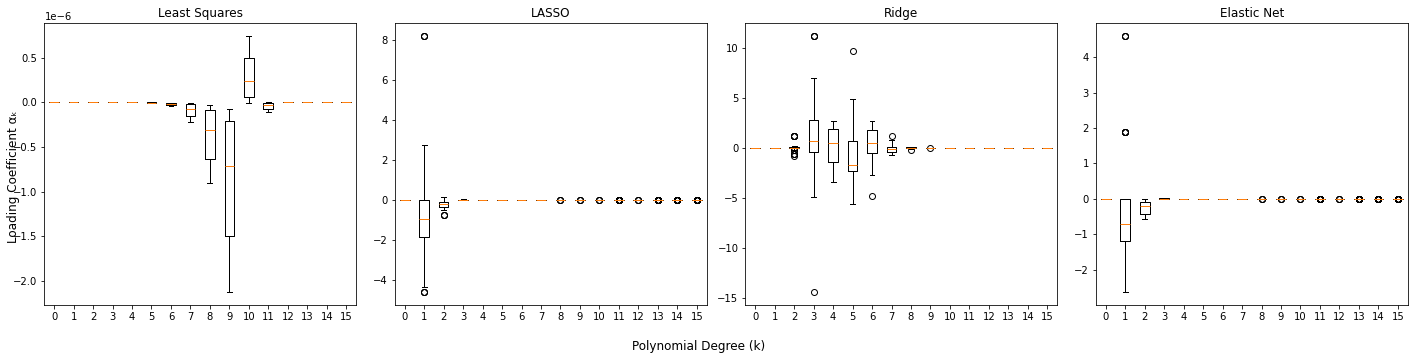

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot the boxplot of the coefficient of each model
coeffs = [coeffs_least_squares_list, coeffs_LASSO_list, coeffs_Ridge_list, coeffs_ElasticNet_list]
titles = ['Least Squares', 'LASSO', 'Ridge', 'Elastic Net']

for i, ax in enumerate(axes): #(I have disregarded the zeroth degree)
    # print(coeffs[i])
    ax.boxplot(coeffs[i][:,:])
    ax.set_title(titles[i])
    ax.set_xticklabels(list(range(0, degree + 1)))

# Add shared labels
fig.supxlabel('Polynomial Degree (k)', fontsize=12)
fig.supylabel('Loading Coefficient αₖ', fontsize=12)

plt.tight_layout()

plt.savefig('coef.pdf', bbox_inches='tight')
plt.show()


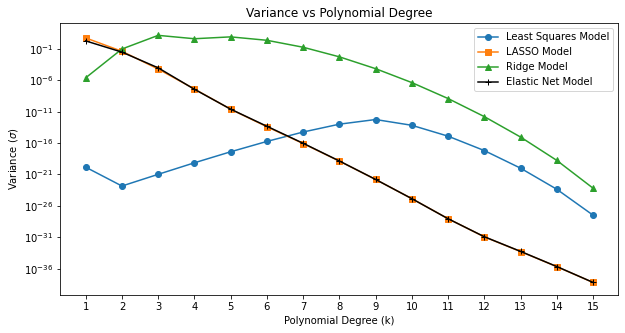

In [38]:
plt.figure(figsize = (10, 5))

plt.plot(range(1, degree + 1), variance_least_squares[1:], label = "Least Squares Model", marker = "o")
plt.plot(range(1, degree + 1), variance_lasso[1:], label = "LASSO Model", marker = "s")
plt.plot(range(1, degree + 1), variance_ridge[1:], label = "Ridge Model", marker = "^")
plt.plot(range(1, degree + 1), variance_en[1:], label = "Elastic Net Model", marker = "+", color = "k")
plt.semilogy()
plt.legend()
plt.ylabel("Variance ($\sigma)$")
plt.xlabel("Polynomial Degree (k)")
plt.xticks(range(1, degree + 1))
plt.title("Variance vs Polynomial Degree")
plt.savefig("Variance.pdf")
plt.show()
